# MNIST

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Global config

In [2]:
# TODO

## Load data

In [3]:
mnist_28x28_train = np.load("mnist_28x28_train.npy")
mnist_8x8_train = np.load("mnist_8x8_train.npy")
train_labels = np.load("train_labels.npy")

mnist_28x28_test = np.load("mnist_28x28_test.npy")
mnist_8x8_test = np.load("mnist_8x8_test.npy")

## Helpers

In [4]:
# TODO

##  Data exploration

### Question 1
Hint: `plt.imshow`

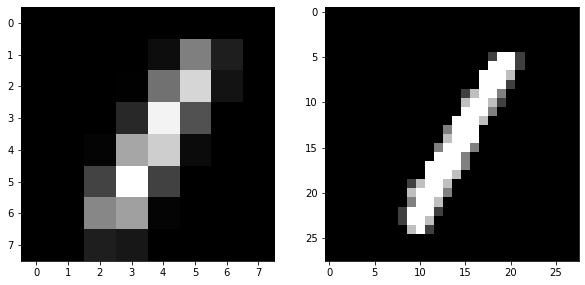

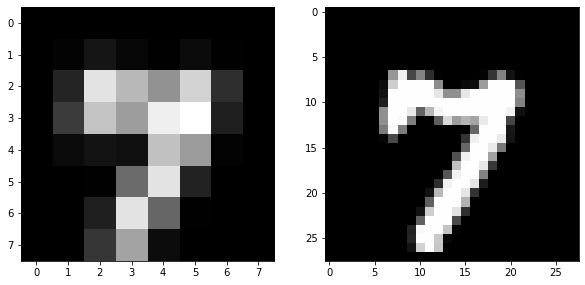

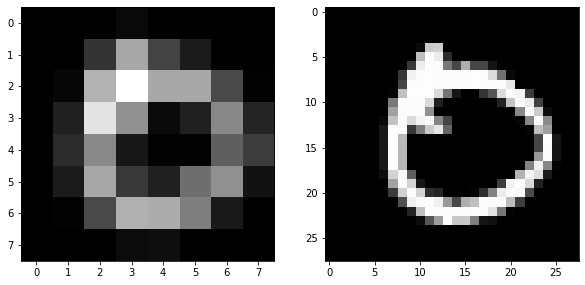

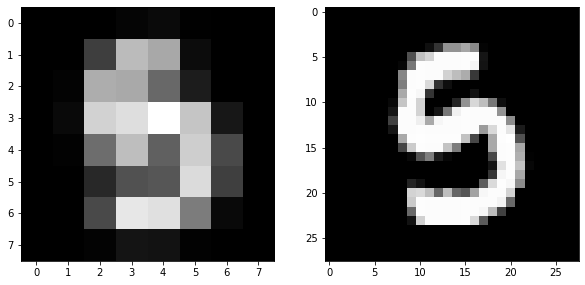

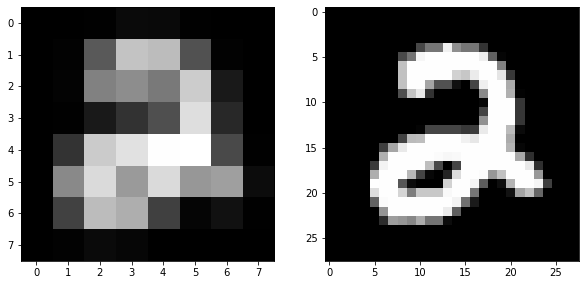

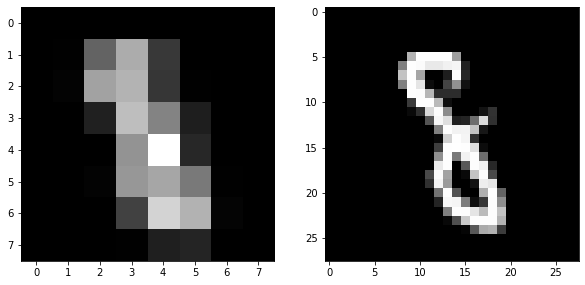

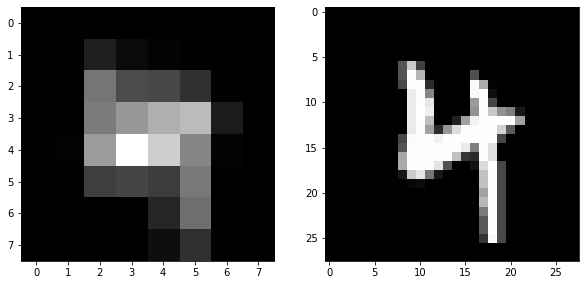

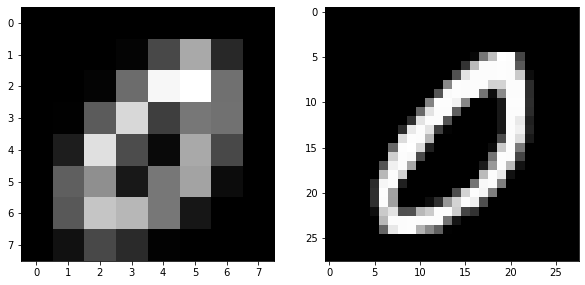

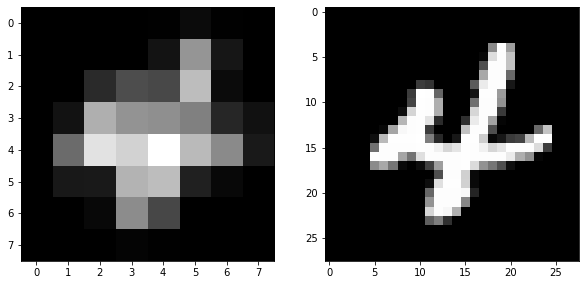

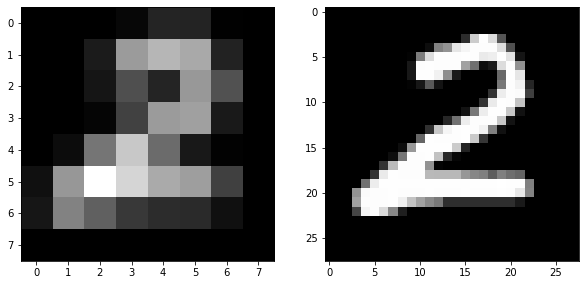

In [5]:
# TODO
for i in range(10):
    digitBig = mnist_28x28_train[i,:,:]
    digitSmall = mnist_8x8_train[i,:,:]
    plt.figure(figsize = (10, 6))
    plt.gray()
    plt.subplot(1, 2, 1)
    plt.imshow(digitSmall)
    plt.subplot(1, 2, 2)
    plt.imshow(digitBig)

##  Data Preparations

### Question 1

In [6]:
# TODO
print(mnist_28x28_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   64 255 255  64   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  255 255 255  64   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
  255 255 191   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [7]:
print(train_labels[np.arange(10)])

[1 7 0 5 2 8 4 0 4 2]


(3750, 784)
pixel34     False
pixel35     False
pixel36     False
pixel37     False
pixel38     False
            ...  
pixel774    False
pixel775    False
pixel777    False
pixel778    False
pixel779    False
Length: 657, dtype: bool
           pixel34      pixel35      pixel36      pixel37      pixel38  \
count  3750.000000  3750.000000  3750.000000  3750.000000  3750.000000   
mean      0.000002     0.000031     0.000116     0.000230     0.000937   
std       0.000128     0.001921     0.007108     0.009127     0.028895   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.007843     0.117647     0.435294     0.501961     0.992157   

           pixel39      pixel40      pixel41      pixel42      pixel43  ...  \
count  3750.000000 

Text(0, 0.5, 'Number of digits')

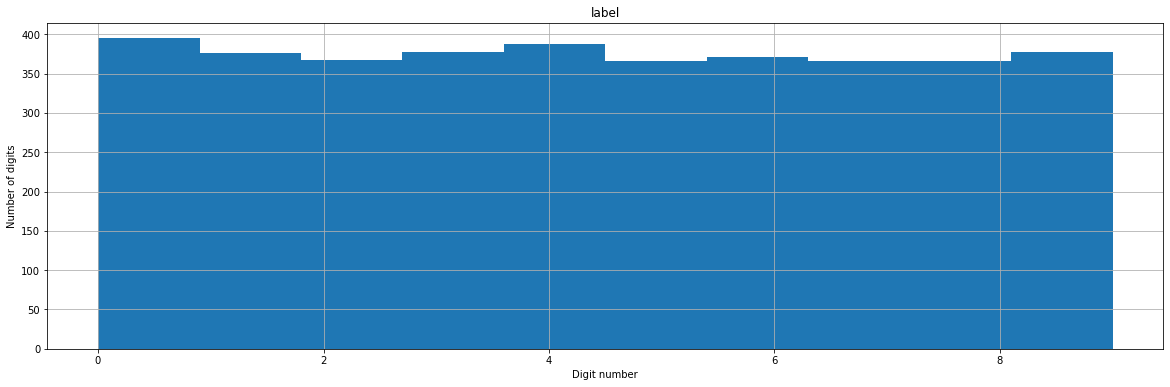

In [34]:
# widths = np.zeros(len(mnist_28x28_train))
# for i in range(len(mnist_28x28_train)):
#     intermediate = np.max(mnist_28x28_train[i], axis = 0)
#     widths[i] = np.average(intermediate)

# lengths = np.zeros(len(mnist_28x28_train))
# for i in range(len(mnist_28x28_train)):
#     intermediate = np.max(mnist_28x28_train[i], axis = 1)
#     lengths[i] = np.average(intermediate)

# average_color = np.zeros(len(mnist_28x28_train))
# for i in range(len(mnist_28x28_train)):
#     average_color[i] = np.average(mnist_28x28_train[i])

# print(widths)
# print(lengths)
x = []
for i in range(len(mnist_28x28_train)):
    intermediate = mnist_28x28_train[i,:,:].reshape(784)
    x.append(intermediate)
x = np.array(x)
x = x/255
print(x.shape)
columns = []
for i in range(784):
    columns.append('pixel' + str(i))
X_train_28x28 = pd.DataFrame(x, columns = columns)
only_zero_columns_28x28 = list(X_train_28x28.columns[(X_train_28x28 == 0).all()])
X_train_28x28.drop(columns = only_zero_columns_28x28, inplace = True)
print((X_train_28x28 > 1).all())
print(X_train_28x28.describe())
print(len(only_zero_columns))
#Here we created the database with the pixel features and removed the columns where for each digit, the...
#... value was 0.
y_train = pd.DataFrame(train_labels, columns = ['label'])

y_train.hist(figsize = (20, 6))
plt.xlabel('Digit number')
plt.ylabel('Number of digits')

In [9]:
#Now we do the same for the 8x8

x = []
for i in range(len(mnist_8x8_train)):
    intermediate = mnist_8x8_train[i,:,:].reshape(64)
    x.append(intermediate)
x = np.array(x)
x = x/255
print(x.shape)
columns = []
for i in range(64):
    columns.append('pixel' + str(i))
X_train_8x8 = pd.DataFrame(x, columns = columns)
only_zero_columns_8x8 = list(X_train_8x8.columns[(X_train_8x8 == 0).all()])
X_train_8x8.drop(columns = only_zero_columns_8x8, inplace = True)
print((X_train_8x8 > 1).all())
print(X_train_8x8.describe())
print(len(only_zero_columns))



(3750, 64)
pixel0     False
pixel1     False
pixel2     False
pixel3     False
pixel4     False
           ...  
pixel59    False
pixel60    False
pixel61    False
pixel62    False
pixel63    False
Length: 64, dtype: bool
            pixel0       pixel1       pixel2       pixel3       pixel4  \
count  3750.000000  3750.000000  3750.000000  3750.000000  3750.000000   
mean      0.000003     0.000282     0.003791     0.013610     0.022258   
std       0.000143     0.003397     0.020131     0.039225     0.049809   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.003922     0.023529   
max       0.007843     0.129412     0.364706     0.384314     0.392157   

            pixel5       pixel6       pixel7       pixel8       pixel9  ...  \
count  3750.000000  3750.000000 

## Experiments

### Question 1

In [10]:
# TODO
from sklearn.model_selection import train_test_split
#Now we do the train_test_split

train_X, test_X, train_y, test_y = train_test_split(X_train_28x28, y_train,
                                                    test_size = 0.2, random_state = 0)

In [11]:
#Now we create our models with the default hyper-parameters
models = {
    'gaussianClassifier' : GaussianNB(),
    'knnClassifier' : KNeighborsClassifier(n_neighbors = 3, weights = "distance"),
    'logisticRegressionClassifier' : LogisticRegression(C = 10, penalty = "none", random_state = 42),
    'svcClassifier' : SVC(C = 10, kernel = "poly", random_state = 42),
    'decisionTreeClassifier' : DecisionTreeClassifier(max_depth = None, min_samples_leaf = 2, random_state = 42)
}

In [12]:
#As you can see from the histogram above, we have a pretty much balanced dataset, meaning that we are...
#...safe to use the accuracy score function and not worry about getting a good score for a bad model.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

### Question 2

In [13]:
# TODO
testScores = []
for name, model in models.items():
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    testScores.append(accuracy_score(test_y, predictions))
print(testScores)

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\oprea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\oprea\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\oprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\oprea\anaconda3\lib\site-packa

[0.568, 0.928, 0.8613333333333333, 0.9413333333333334, 0.724]


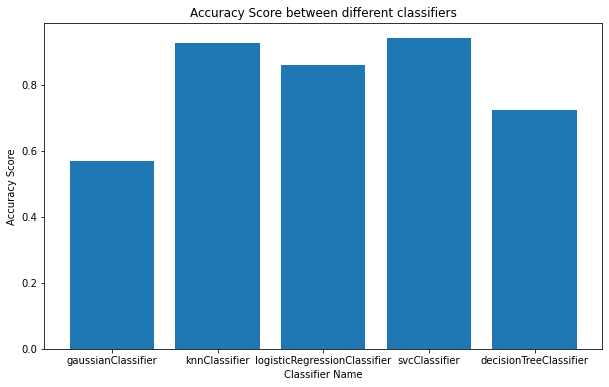

In [14]:
plt.figure(figsize = (10, 6))
plt.bar(models.keys(), testScores)
plt.title("Accuracy Score between different classifiers")
plt.ylabel('Accuracy Score')
plt.xlabel('Classifier Name')
plt.show()

### Question 3

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best set of parameters for knnClassifier is {'n_neighbors': 1, 'weights': 'distance'}
Best test score is 0.9146666666666668


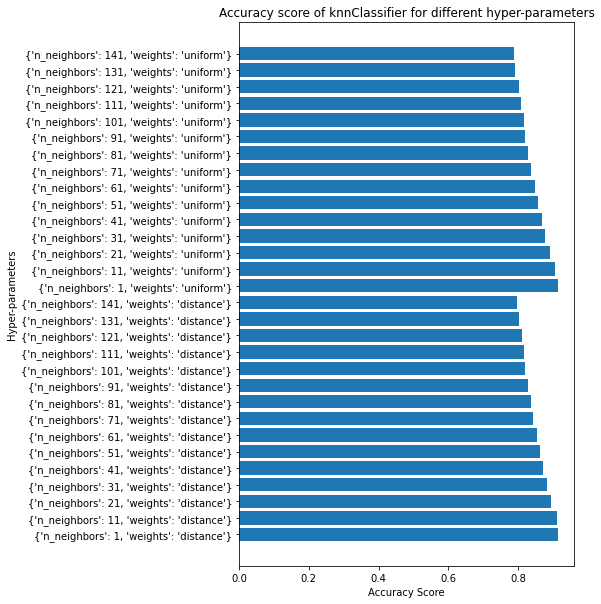

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best set of parameters for logisticRegressionClassifier is {'C': 0.1, 'penalty': 'l2'}
Best test score is 0.89


C:\Users\oprea\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


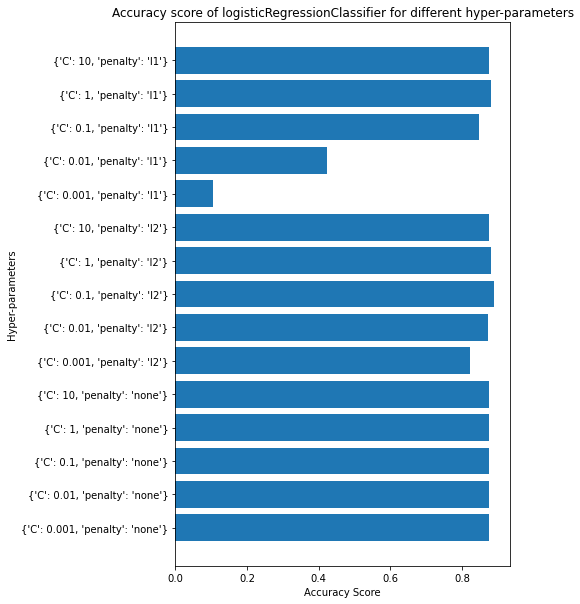

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best set of parameters for svcClassifier is {'C': 10, 'kernel': 'rbf'}
Best test score is 0.9443333333333334


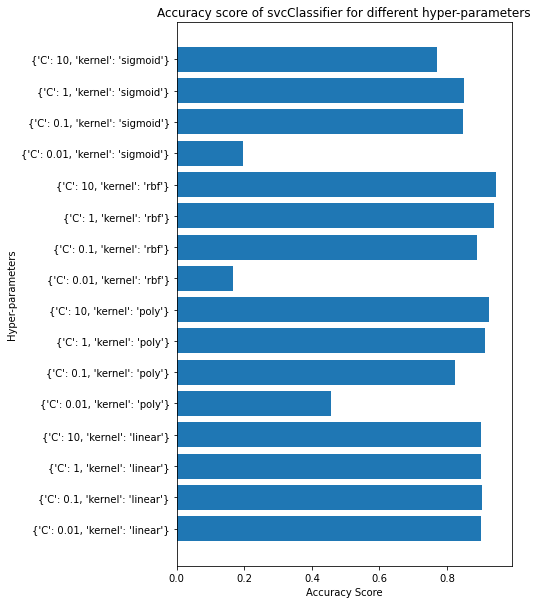

Best set of parameters for decisionTreeClassifier is {'max_depth': 20, 'min_samples_leaf': 4}
Best test score is 0.7213333333333334


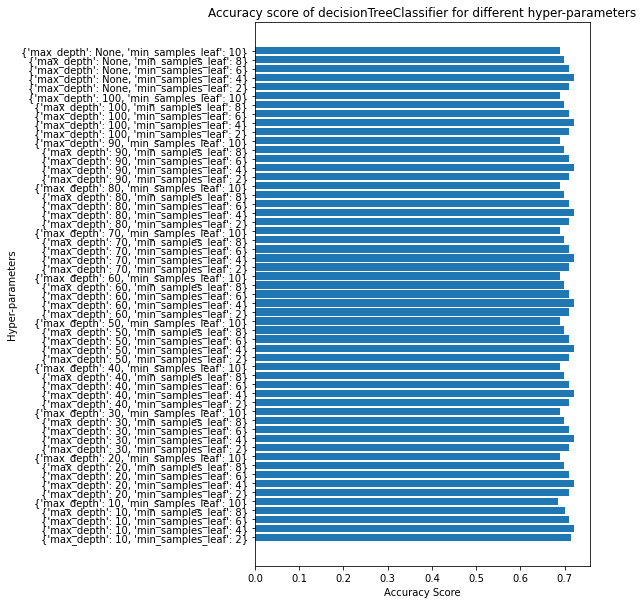

In [15]:
# TODO
score_function = make_scorer(accuracy_score)

param_grids = {
    'knnClassifier' : [{'n_neighbors' : np.arange(1, 150, 10), 'weights' : ['distance']},
                                {'n_neighbors' : np.arange(1, 150, 10), 'weights' : ['uniform']}],
    'logisticRegressionClassifier' : [{'C' : [.001, .01, .1, 1, 10], 'penalty' : ['none']},
              {'C' : [.001, .01, .1, 1, 10], 'penalty' : ['l2']},
              {'C' : [.001, .01, .1, 1, 10], 'penalty' : ['l1']}],
    'svcClassifier' : [{'C' : [.01, .1, 1, 10], 'kernel' : ['linear']},
              {'C' : [.01, .1, 1, 10], 'kernel' : ['poly']},
              {'C' : [.01, .1, 1, 10], 'kernel' : ['rbf']},
              {'C' : [.01, .1, 1, 10], 'kernel' : ['sigmoid']}],
    'decisionTreeClassifier' : [{'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_leaf' : [2, 4, 6, 8, 10]},
             {'max_depth' : [None], 'min_samples_leaf' : [2, 4, 6, 8, 10]}]
}

models = {
    'knnClassifier' : KNeighborsClassifier(),
    'logisticRegressionClassifier' : LogisticRegression(solver = 'saga', random_state = 42),
    'svcClassifier' : SVC(random_state = 42),
    'decisionTreeClassifier' : DecisionTreeClassifier(random_state = 42)
}

for name, model in models.items():
    cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
    clf = GridSearchCV(estimator = model, param_grid = param_grids.get(name), scoring = score_function,
                       n_jobs = -1, cv = cv)
    clf.fit(train_X, train_y)
    
    print('Best set of parameters for', name, 'is', clf.best_params_)
    print('Best test score is', clf.best_score_)
    
    params = clf.cv_results_.get('params')
    params_string = []
    for i in range(len(params)):
        params_string.append(str(params[i]))
    
    plt.figure(figsize = (6, 10))
    plt.barh(y = params_string, width = list(clf.cv_results_.get('mean_test_score')))
    plt.title('Accuracy score of ' + name + ' for different hyper-parameters')
    plt.xlabel('Accuracy Score')
    plt.ylabel('Hyper-parameters')
    plt.show()
    

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best set of parameters for knnClassifier is {'n_neighbors': 4, 'weights': 'distance'}
Best test score is 0.9209999999999999


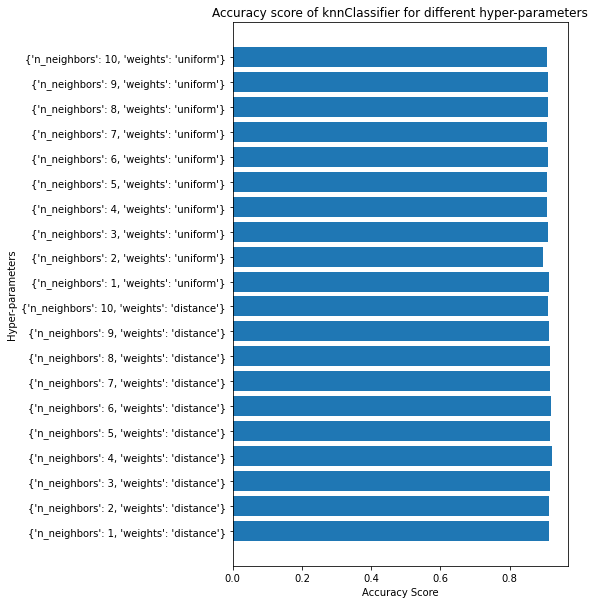

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best set of parameters for logisticRegressionClassifier is {'C': 10, 'penalty': 'l1'}
Best test score is 0.8766666666666667


C:\Users\oprea\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


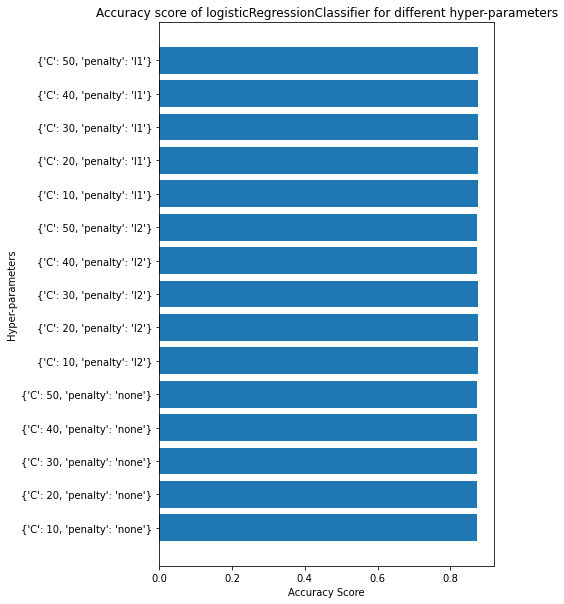

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best set of parameters for svcClassifier is {'C': 10, 'kernel': 'rbf'}
Best test score is 0.9443333333333334


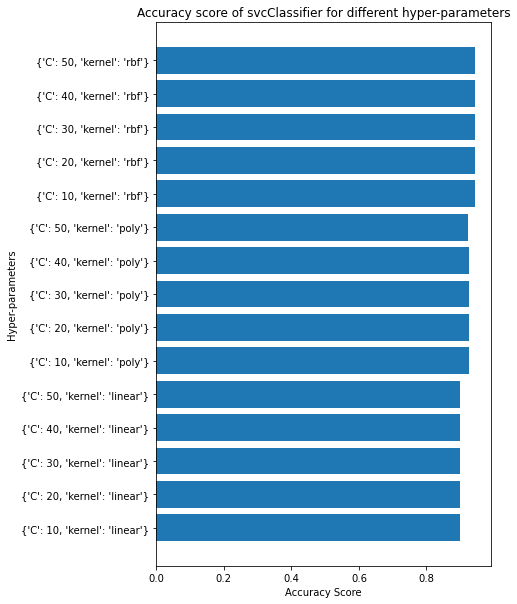

In [20]:
#The DecisionTree classifier not only consistently gives a bad score compared to the others classifiers...
#... but also does not improve much with the hyper-parameters that we chose. This is the reason that...
#... we won't alocate any more resources to the hyper-parameter tuning for the Decision Tree Classifier

param_grids = {
    'knnClassifier' : [{'n_neighbors' : np.arange(1, 11), 'weights' : ['distance']},
                                {'n_neighbors' : np.arange(1, 11), 'weights' : ['uniform']}],
    'logisticRegressionClassifier' : [{'C' : [10, 20, 30, 40, 50], 'penalty' : ['none']},
              {'C' : [10, 20, 30, 40, 50], 'penalty' : ['l2']},
              {'C' : [10, 20, 30, 40, 50], 'penalty' : ['l1']}],
    'svcClassifier' : [{'C' : [10, 20, 30, 40, 50], 'kernel' : ['linear']},
              {'C' : [10, 20, 30, 40, 50], 'kernel' : ['poly']},
              {'C' : [10, 20, 30, 40, 50], 'kernel' : ['rbf']}]
}

models = {
    'knnClassifier' : KNeighborsClassifier(),
    'logisticRegressionClassifier' : LogisticRegression(solver = 'saga', random_state = 42),
    'svcClassifier' : SVC(random_state = 42)
}

for name, model in models.items():
    cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
    clf = GridSearchCV(estimator = model, param_grid = param_grids.get(name), scoring = score_function,
                       n_jobs = -1, cv = cv)
    clf.fit(train_X, train_y)
    
    print('Best set of parameters for', name, 'is', clf.best_params_)
    print('Best test score is', clf.best_score_)
    
    params = clf.cv_results_.get('params')
    params_string = []
    for i in range(len(params)):
        params_string.append(str(params[i]))
    
    plt.figure(figsize = (6, 10))
    plt.barh(y = params_string, width = list(clf.cv_results_.get('mean_test_score')))
    plt.title('Accuracy score of ' + name + ' for different hyper-parameters')
    plt.xlabel('Accuracy Score')
    plt.ylabel('Hyper-parameters')
    plt.show()

In [ ]:
#As you can see, we're not improving that much from one iteration to another, therefore we won't alocate...
#... any more resources to hyper-parameter tuning

### Question 4 

In [21]:
# TODO
tuned_models = {
    'gaussianClassifier' : GaussianNB(),
    'knnClassifier' : KNeighborsClassifier(n_neighbors = 4, weights = "distance"),
    'logisticRegressionClassifier' : LogisticRegression(C = 10, penalty = "l1", random_state = 42, solver = 'saga'),
    'svcClassifier' : SVC(C = 10, kernel = "rbf", random_state = 42),
    'decisionTreeClassifier' : DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 4, random_state = 42)
}

In [23]:
testScores_tuned = []
for name, model in tuned_models.items():
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    testScores_tuned.append(accuracy_score(test_y, predictions))
print(testScores_tuned)

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\oprea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\oprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\oprea\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[0.568, 0.9306666666666666, 0.892, 0.96, 0.7306666666666667]


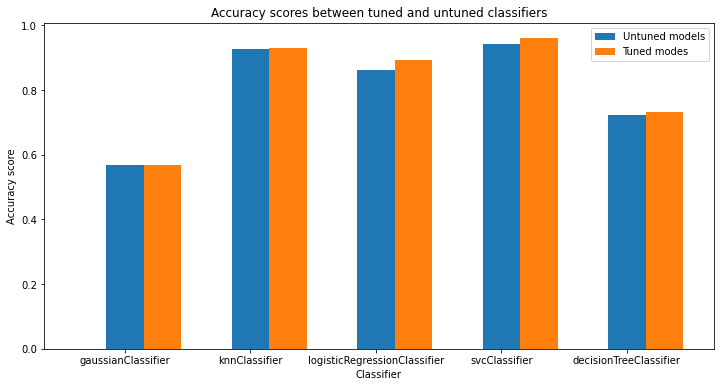

In [27]:
fig, ax = plt.subplots()

width = 0.3
x_testScores = [0, 1, 2, 3, 4]
x_testScores_tuned = [0.3, 1.3, 2.3, 3.3, 4.3]
fig.set_figwidth(12)
fig.set_figheight(6)
ax.bar(x_testScores, testScores, width = width, label = 'Untuned models')
ax.bar(x_testScores_tuned, testScores_tuned, width = width, label = 'Tuned modes')
ax.bar(tuned_models.keys(), 0)
ax.legend(loc = 'best')
ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy score")
ax.set_title('Accuracy scores between tuned and untuned classifiers')
plt.show()

### Question 5

In [30]:
# TODO
testScores_8x8 = []
train_X_8x8, test_X_8x8, train_y_8x8, test_y_8x8 = train_test_split(X_train_8x8, y_train,
                                                    test_size = 0.2, random_state = 0)

for name, model in tuned_models.items():
    model.fit(train_X_8x8, train_y_8x8)
    predictions = model.predict(test_X_8x8)
    testScores_8x8.append(accuracy_score(test_y_8x8, predictions))
print(testScores_8x8)

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\oprea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\oprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\oprea\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[0.576, 0.932, 0.9, 0.9466666666666667, 0.7933333333333333]


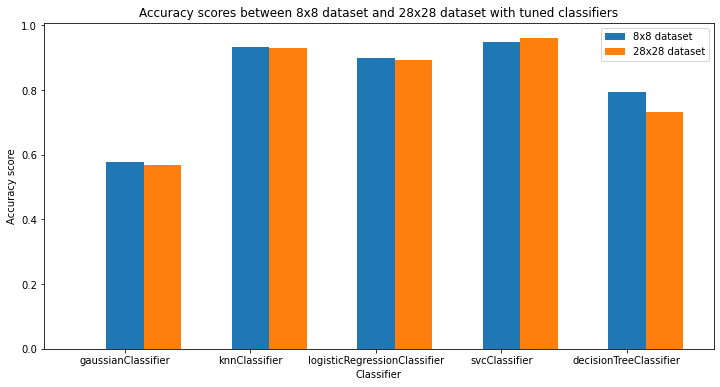

In [37]:
fig, ax = plt.subplots()

width = 0.3
x_testScores_8x8 = [0, 1, 2, 3, 4]
x_testScores_tuned = [0.3, 1.3, 2.3, 3.3, 4.3]
fig.set_figwidth(12)
fig.set_figheight(6)
ax.bar(x_testScores_8x8, testScores_8x8, width = width, label = '8x8 dataset')
ax.bar(x_testScores_tuned, testScores_tuned, width = width, label = '28x28 dataset')
ax.bar(tuned_models.keys(), 0)
ax.legend(loc = 'best')
ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy score")
ax.set_title('Accuracy scores between 8x8 dataset and 28x28 dataset with tuned classifiers')
plt.show()

### Question 6

In [35]:
mnist_28x28_test

x = []
for i in range(len(mnist_28x28_test)):
    intermediate = mnist_28x28_test[i,:,:].reshape(784)
    x.append(intermediate)
x = np.array(x)
x = x/255
print(x.shape)
columns = []
for i in range(784):
    columns.append('pixel' + str(i))
X_test_28x28 = pd.DataFrame(x, columns = columns)
X_test_28x28.drop(columns = only_zero_columns_28x28, inplace = True)
print((X_test_28x28 > 1).all())
print(X_test_28x28.describe())
print(len(only_zero_columns))

(1250, 784)
pixel34     False
pixel35     False
pixel36     False
pixel37     False
pixel38     False
            ...  
pixel774    False
pixel775    False
pixel777    False
pixel778    False
pixel779    False
Length: 657, dtype: bool
       pixel34  pixel35  pixel36  pixel37      pixel38      pixel39  \
count   1250.0   1250.0   1250.0   1250.0  1250.000000  1250.000000   
mean       0.0      0.0      0.0      0.0     0.000536     0.002387   
std        0.0      0.0      0.0      0.0     0.013351     0.048695   
min        0.0      0.0      0.0      0.0     0.000000     0.000000   
25%        0.0      0.0      0.0      0.0     0.000000     0.000000   
50%        0.0      0.0      0.0      0.0     0.000000     0.000000   
75%        0.0      0.0      0.0      0.0     0.000000     0.000000   
max        0.0      0.0      0.0      0.0     0.443137     1.000000   

           pixel40      pixel41  pixel42      pixel43  ...     pixel769  \
count  1250.000000  1250.000000   1250.0  1250.000

In [36]:
# TODO
#Now since we've seen that the Support Vector Machine performs best, we can use the entire data...
#... for training before submitting the entire predictions
finalModel = SVC(C = 10, kernel = "rbf", random_state = 42)
finalModel.fit(X_train_28x28, y_train)

prediction = finalModel.predict(X_test_28x28) # TODO replace this with you own prediction
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_mnist.txt", index=False, header=False)

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
